## Image-Processing based Atmospheric River Tracking (IPART) algorithms
---------------------------------------------------------
### IPART (Image-Processing based Atmospheric River Tracking) is a Python package for automated Atmospheric River (AR) detection, axis finding and AR tracking from gridded Integrated Vapor Transport (IVT) data, for instance Reanalysis datasets, or model simulations.

### IPART is intended for researchers and students who are interested in the field of atmospheric river studies in the present day climate or future projections. Unlike the convectional detection methods that rely on magnitude thresholding on the intensities of atmospheric vapor fluxes, IPART tackles the detection task from a spatio-temporal scale perspective and is thus free from magnitude thresholds.

Further documentation can be found at https://ipart.readthedocs.io/en/latest/. 

A description of the methods is given in this work: Xu, G., Ma, X., Chang, P., and Wang, L.: Image-processing-based atmospheric river tracking method version 1 (IPART-1), Geosci. Model Dev., 13, 4639–4662, https://doi.org/10.5194/gmd-13-4639-2020, 2020.

In [1]:
%matplotlib inline
import os
import numpy as np
from ipart.utils import funcs

UFLUX_FILE=os.path.join('.', 'E:/Data/IVT/uflux_s_6_1984_Jan.nc')
VFLUX_FILE=os.path.join('.', 'E:/Data/IVT/vflux_s_6_1984_Jan.nc')
OUTPUTFILE=os.path.join('.', 'E:/Data/IVT/ivt_s_6_1984_Jan.nc')

In [2]:
#-----------Read in data----------------------
uflux=funcs.readNC(UFLUX_FILE, 'p71.162') # 'p71.162' is the id code for u-flux
vflux=funcs.readNC(VFLUX_FILE, 'p72.162') # 'p72.162' is the id code for v-flux

print('\n######## Info of uflux ########')
print(uflux.info())


######## Info of uflux ########
### Description of slab ###
  id: p71.162
  shape: (124, 94, 480)
  filename: None
  missing_value: -32767
  comments: None
  grid_name: None
  grid_type: None
  long_name: Vertical integral of eastward water vapour flux
  units: kg m**-1 s**-1
  standard_name: None
  Order: ['time', 'latitude', 'longitude']
 
** Dimension 1 **
   calendar: gregorian
   isunlimited: True
   long_name: time
   units: hours since 1900-01-01 00:00:00.0
   length: 124
   1st: 1984-01-01 00:00:00
   lst: 1984-01-31 18:00:00
** Dimension 2 **
   isunlimited: False
   long_name: latitude
   units: degrees_north
   length: 94
   1st: 10.0
   lst: 79.75
** Dimension 3 **
   isunlimited: False
   long_name: longitude
   units: degrees_east
   length: 480
   1st: -180.0
   lst: 179.25
### End of description ###

None


In [4]:
ivt=np.ma.sqrt(uflux.data*uflux.data+vflux.data*vflux.data)
ivt=funcs.NCVAR(ivt, 'ivt', uflux.axislist, {'name': 'ivt', 'long_name': 'integrated vapor transport (IVT)',
                                            'standard_name': 'integrated_vapor_transport',
                                            'title': 'integrated vapor transport (IVT)',
                                            'units': getattr(uflux, 'units', '')})


#--------Save------------------------------------
print('\n# Saving output to:\n',OUTPUTFILE)
funcs.saveNC(OUTPUTFILE, ivt)


# Saving output to:
 E:/Data/IVT/ivt_s_6_1984_Jan.nc


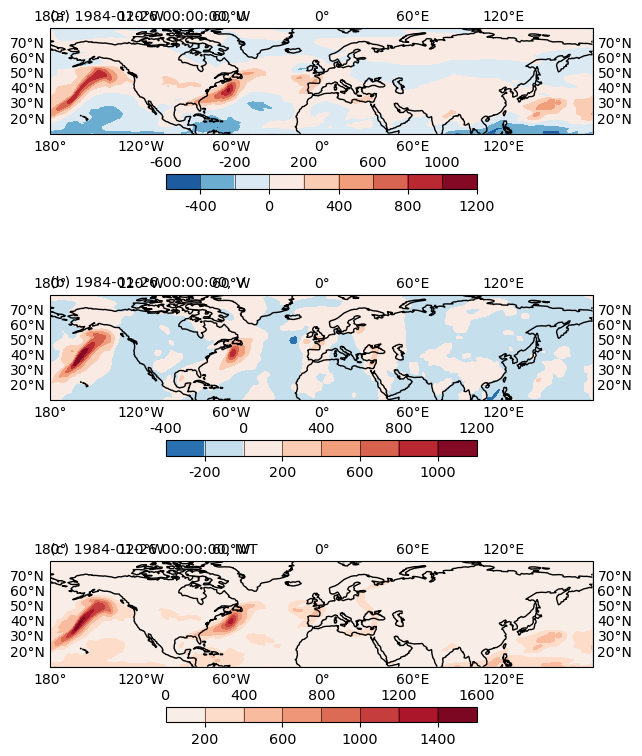

In [5]:
#------- Plot some figure -----------
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from ipart.utils import plot

figure=plt.figure(figsize=(7,10),dpi=100)
idx=100  # select the 101th time step from the beginning
time_str=uflux.getTime()[idx]

plot_vars=[uflux.data[idx], vflux.data[idx], ivt.data[idx]]
titles=['U', 'V', 'IVT']

for ii, vii in enumerate(plot_vars):
    axii=figure.add_subplot(3,1,ii+1,projection=ccrs.PlateCarree())
    iso=plot.Isofill(vii, 10, 1, 2)
    plot.plot2(vii, iso, axii,
            title='%s, %s' %(str(time_str), titles[ii]),
            xarray=uflux.getLongitude(),
               yarray=uflux.getLatitude(),
            legend='local',
            fix_aspect=False)

figure.show()

In [6]:
from ipart import thr

IVT_FILE=os.path.join('.', 'E:/Data/IVT/ivt_s_6_1984_Jan.nc')
VARIN='ivt'    
SHIFT_LON=80  # shift longitudinally to center Pacific and Atlantic
KERNEL=[16,6,6]   # half length of time (time steps), and half length of spatial (number of grids)
OUTPUTDIR=os.path.abspath('.')
var=funcs.readNC(IVT_FILE, 'ivt')
lon=var.getLongitude()
var=var.shiftLon(SHIFT_LON)
print('var.shape=', var.shape)
#----------------------Do THR----------------------
ivt, ivtrec, ivtano=thr.THR(var, KERNEL)

var.shape= (124, 94, 480)

# <THR>: Computing erosion ...

# <THR>: Computing reconstruction ...


In [7]:
if not os.path.exists(OUTPUTDIR):
    os.makedirs(OUTPUTDIR)

fname=os.path.split(IVT_FILE)[1]
file_out_name='%s-THR-kernel-t%d-s%d.nc'\
        %(os.path.splitext(fname)[0], KERNEL[0], KERNEL[1])

abpath_out=os.path.join(OUTPUTDIR,file_out_name)
print('\n# Saving output to:\n',abpath_out)
funcs.saveNC(abpath_out, ivt, 'w')
funcs.saveNC(abpath_out, ivtrec, 'a')
funcs.saveNC(abpath_out, ivtano, 'a')


# Saving output to:
 C:\Users\HOASEN\Documents\Untitled Folder\ivt_s_6_1984_Jan-THR-kernel-t16-s6.nc



# <getRange>: Get quantiles for vars
# <getQuantiles>: 0.001 left quantile: 0.000000.  0.999 right quantile: 1159.008301.
# <getQuantiles>: 0.005 left quantile: 0.000000.  0.995 right quantile: 805.117798.
# <getQuantiles>: 0.010 left quantile: 0.000000.  0.990 right quantile: 556.444763.
# <getQuantiles>: 0.025 left quantile: 0.000000.  0.975 right quantile: 347.428589.
# <getQuantiles>: 0.050 left quantile: 0.000000.  0.950 right quantile: 244.500824.
# <getQuantiles>: 0.100 left quantile: 0.000000.  0.900 right quantile: 222.795609.


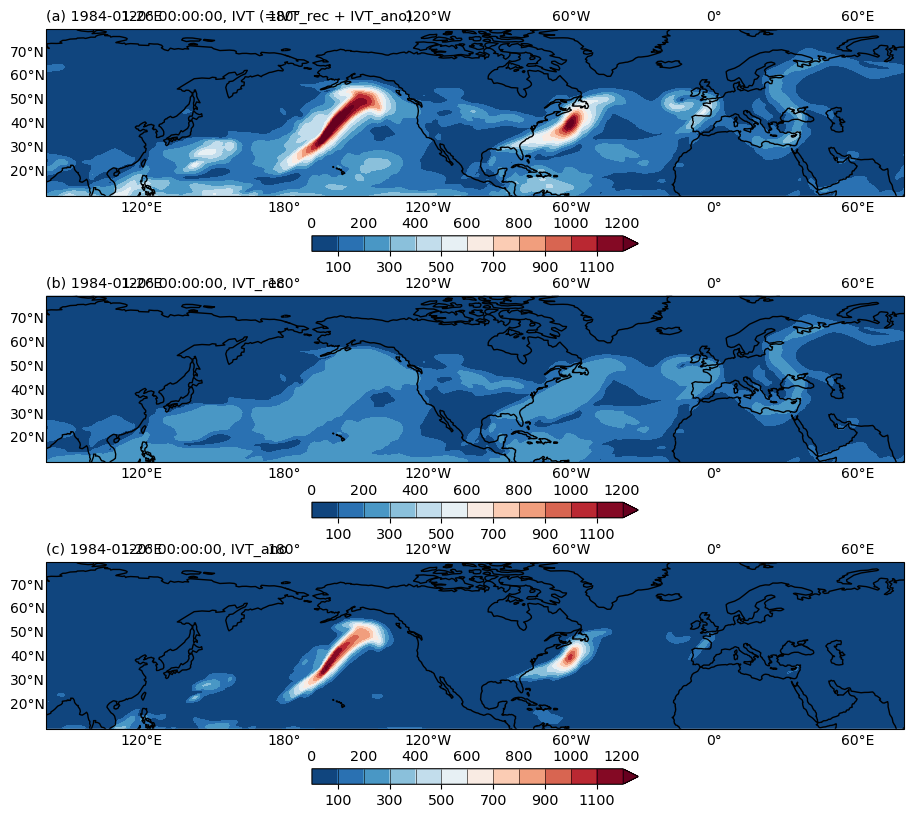

In [11]:
figure=plt.figure(figsize=(15,10),dpi=100)
idx=100  # select the 101th time step from the beginning
time_str=ivt.getTime()[idx]

plot_vars=[ivt.data[idx], ivtrec.data[idx], ivtano.data[idx]]
iso=plot.Isofill(plot_vars, 12, 1, 1, min_level=0, qr=0.001)
titles=['IVT (=IVT_rec + IVT_ano)', 'IVT_rec', 'IVT_ano']

for ii, vii in enumerate(plot_vars):
    axii=figure.add_subplot(3,1,ii+1,projection=ccrs.PlateCarree())
    
    plot.plot2(vii, iso, axii,
            title='%s, %s' %(str(time_str), titles[ii]),
               xarray=ivt.getLongitude(),
               yarray=ivt.getLatitude(),
            legend='local',
            fix_aspect=False)
    
pdf_filename = 'E:/Data/IVT/IVT_after_decompose.pdf'
plt.savefig(pdf_filename, format='pdf', bbox_inches='tight')
jpg_filename = 'E:/Data/IVT/IVT_after_decompose.jpg'
plt.savefig(jpg_filename, format='jpg', bbox_inches='tight')

figure.show()